# Lab | Random variable distributions


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from scipy.stats import binom

1. Get the numerical variables from our dataset.


In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 
num = data.select_dtypes(include=np.number)
num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.


In [4]:
def plot (df):
    for col in df:
        sns.displot(num, x=col)


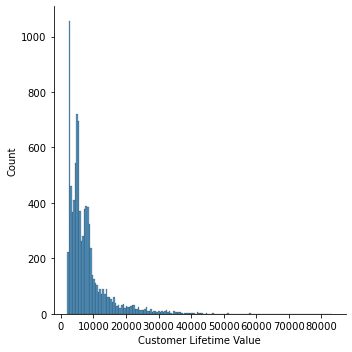

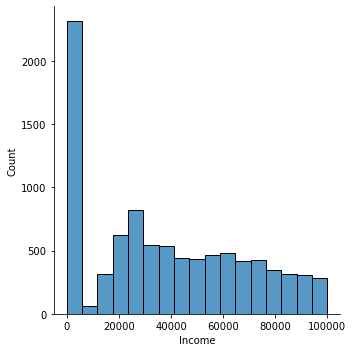

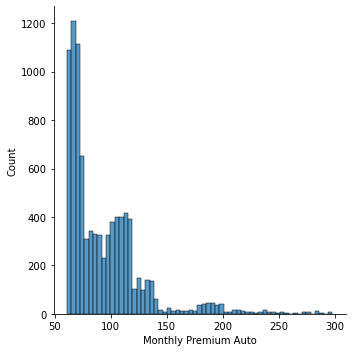

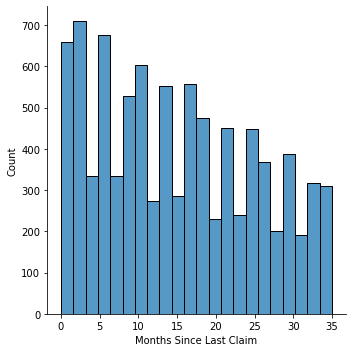

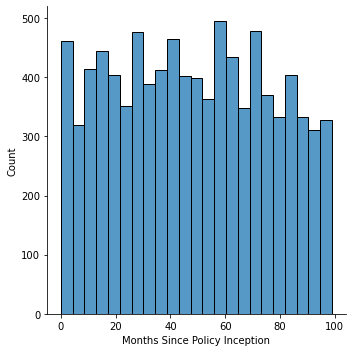

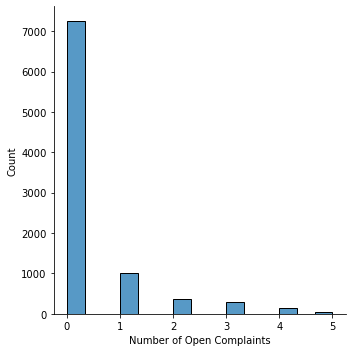

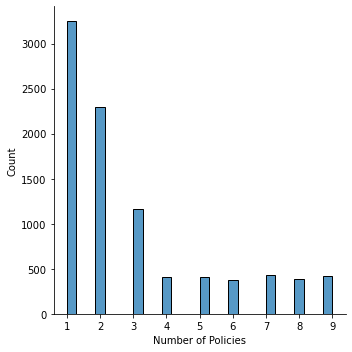

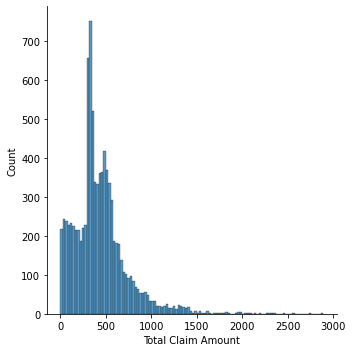

In [22]:
plot(num)

The only one whose frequency distribution seems like a normal distibution is "Months Since Policy Inception" and may be Income with a big outlier for lower income.

All the others follow more a exponential distribution.

3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.


LOG TRANSFORM: (this time we are replacing the -inf values after we take logarithm by 0)

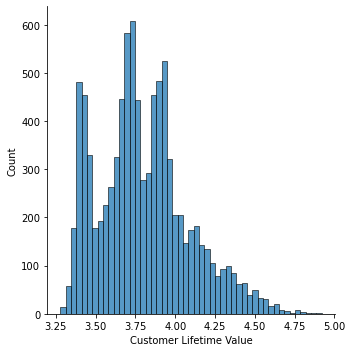

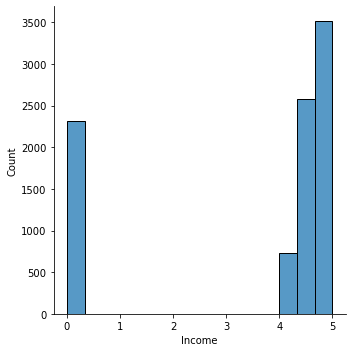

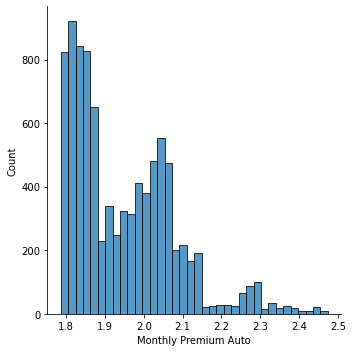

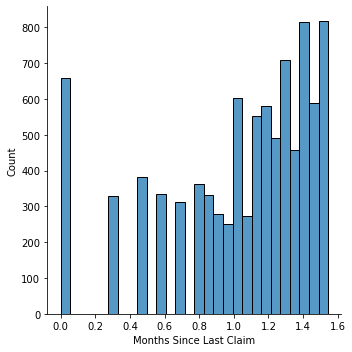

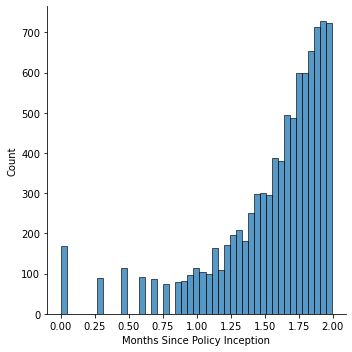

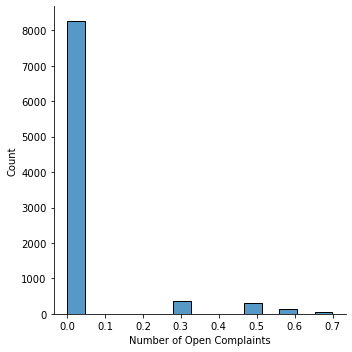

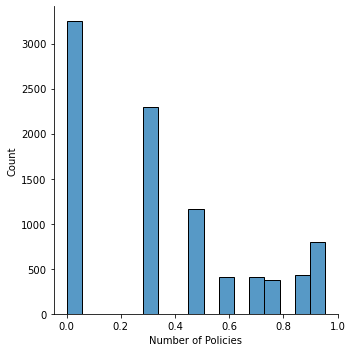

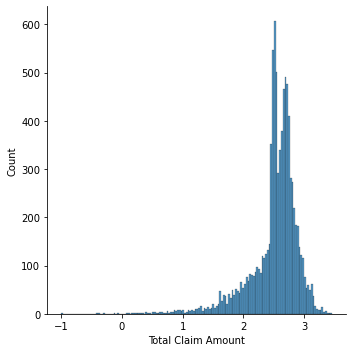

In [5]:
def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0
for col in num:
    col = num[col].apply(lambda x :log_transfom_clean1(x))
    sns.displot(num, x=col) 

Rental Claim Amount :  as eliminates negative values.


Months_since_policy_inception :  makes it less normal , more logaritmnic as it was simsilar ton a normal already
Same as in Income. 

The reduction of outliers and negative values can make them more Normal like but not really enough to consider 

(9134, 8)
[[0.01062925 0.56284694 0.03375527 ... 0.         0.         0.13297388]
 [0.06240565 0.         0.13924051 ... 0.         0.875      0.39105113]
 [0.13495982 0.48776267 0.19831224 ... 0.         0.125      0.19576416]
 ...
 [0.07695057 0.         0.10126582 ... 0.6        0.125      0.27329676]
 [0.06909758 0.2194517  0.14767932 ... 0.         0.25       0.2388757 ]
 [0.00876645 0.         0.06751055 ... 0.         0.         0.12771622]]


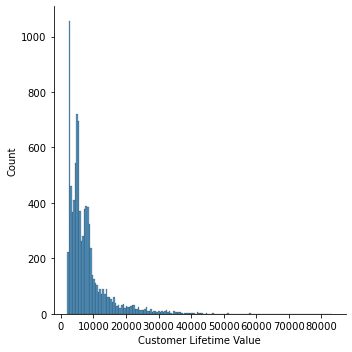

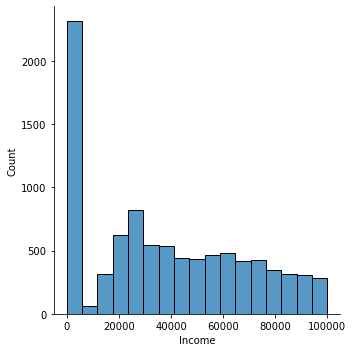

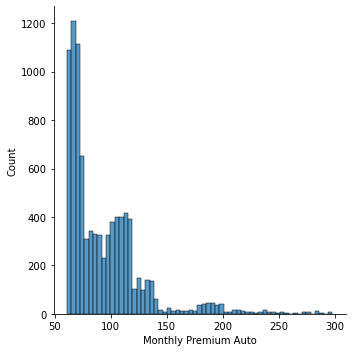

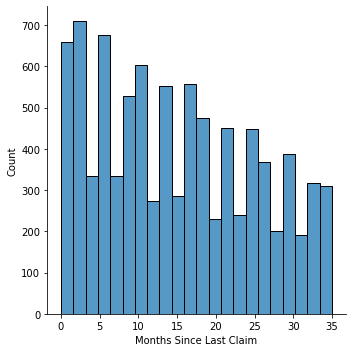

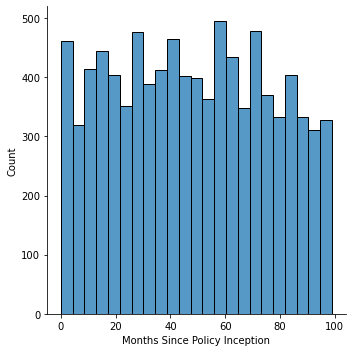

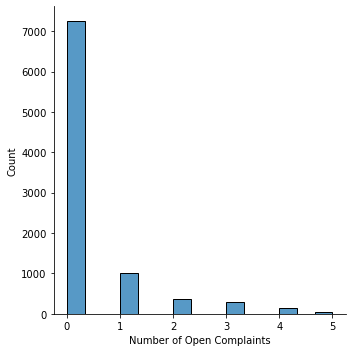

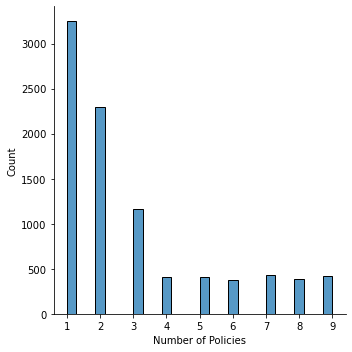

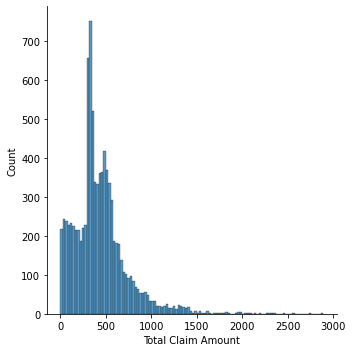

In [6]:
from sklearn.preprocessing import MinMaxScaler 
#MINMAX
#Normalizing data: make data range from 0 - 1, instead of from min to max
#Train the transformer:
transformer = MinMaxScaler().fit(num)
#We execute the transformer we just trained: 
num_normalized = transformer.transform(num)
#results in an array:
print(num_normalized.shape)
print(num_normalized)
w = pd.DataFrame(num_normalized, columns=num.columns)

plot(w)

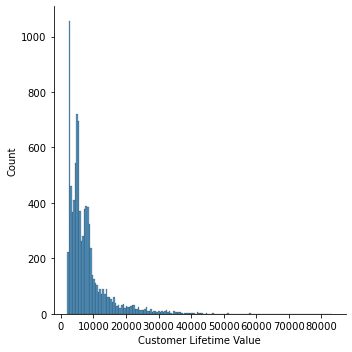

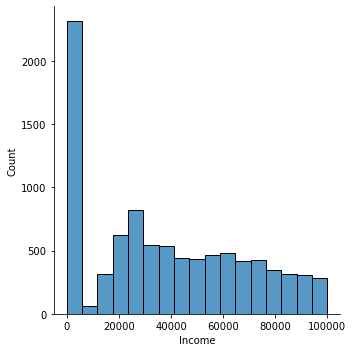

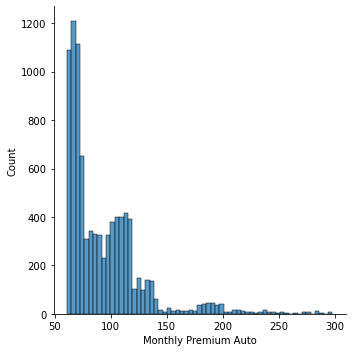

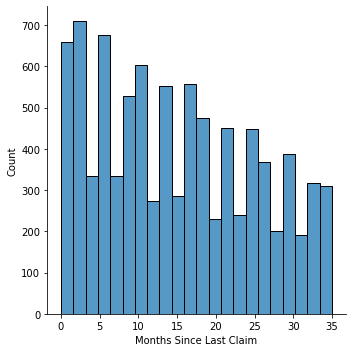

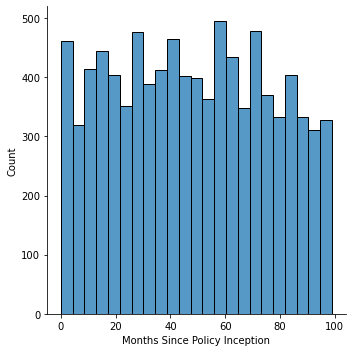

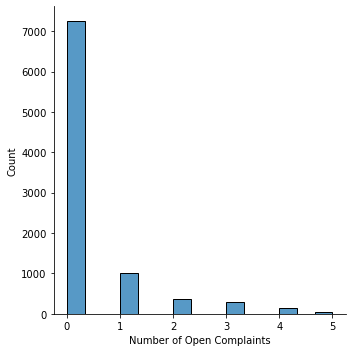

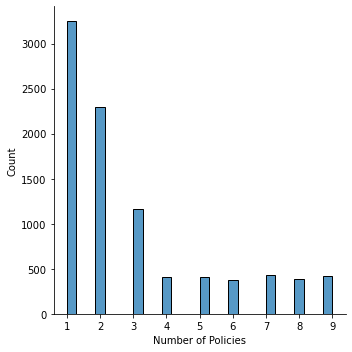

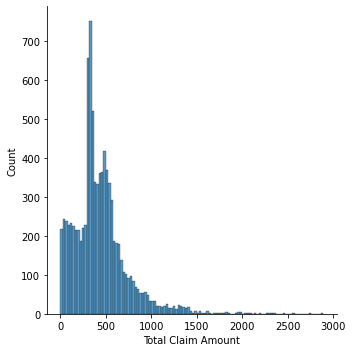

In [8]:
from sklearn.preprocessing import StandardScaler
#STANDARD SCALER:
# scaling standard scaler: make data distributed with mean=0 and std=1 
#(for every observation >> substract the mean and divides by stdev)
#Train the transformer:
transformer = StandardScaler().fit(num)
#Execute the transformer:
num_standardized = transformer.transform(num)
#results in an array:
#convert to DF:
k = pd.DataFrame(num_standardized, columns=num.columns)
plot(k)

None of the transformations work well to Normalize 